In [1]:
import numpy as np 
from tqdm import tqdm
import cv2
import os

In [2]:
TRAIN_DIR = ('D:\\Memphis\\Independent Study\\New folder (2)\\TrainSet\\X\\y\\')

In [3]:
TEST_DIR = ('D:\\Memphis\\Independent Study\\New folder (2)\\TestSet\\X\\y\\')

In [4]:
TEST_DIR

'D:\\Memphis\\Independent Study\\New folder (2)\\TestSet\\X\\y\\'

In [5]:
TRAIN_DIR

'D:\\Memphis\\Independent Study\\New folder (2)\\TrainSet\\X\\y\\'

In [52]:
from matplotlib import pyplot as plt

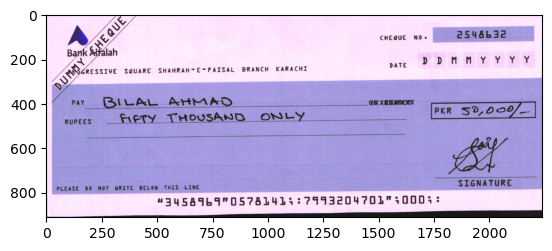

In [53]:
img = cv2.imread('D:\\Memphis\\Independent Study\\New folder (2)\\TrainSet\\X\\X_050.jpeg')
plt.imshow(img)

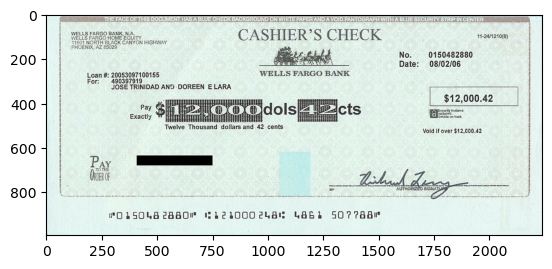

In [72]:
img = cv2.imread('D:\\Memphis\\Independent Study\\New folder (2)\\TestSet\\X\\X_013.jpeg')
plt.imshow(img)

(912, 2240)

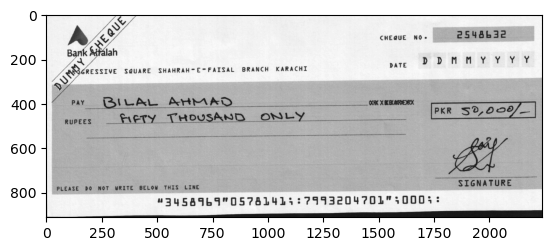

In [54]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
gray.shape

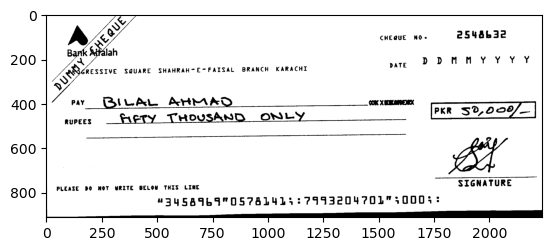

In [55]:
_,thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

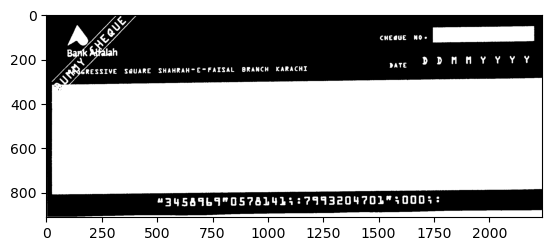

In [56]:
# Threshold the image to create a binary mask
_, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
img_thresh_otsu = mask
plt.imshow(mask, cmap='gray')

In [57]:
kernel = np.ones((1,50), np.uint8)
kernel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1]], dtype=uint8)

(912, 2240)

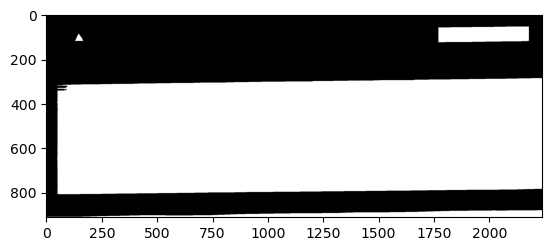

In [58]:
mask = cv2.erode(mask, kernel, iterations=1)
plt.imshow(mask, cmap='gray')
mask.shape

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

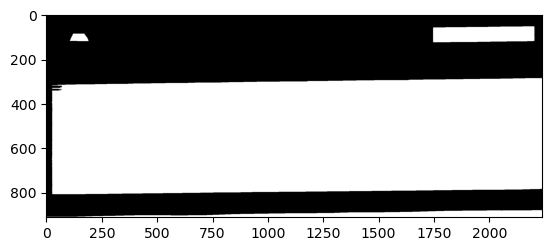

In [59]:
mask = cv2.dilate(mask, kernel, iterations=1)
plt.imshow(mask,cmap='gray')
mask

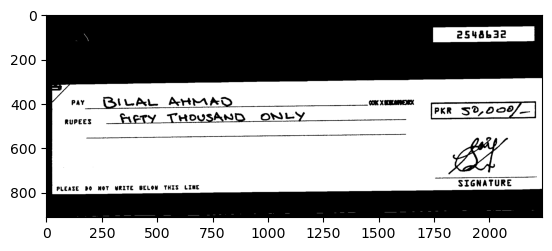

In [60]:
result = cv2.bitwise_and(thresh,thresh,mask=mask)
plt.imshow(result, cmap='gray')

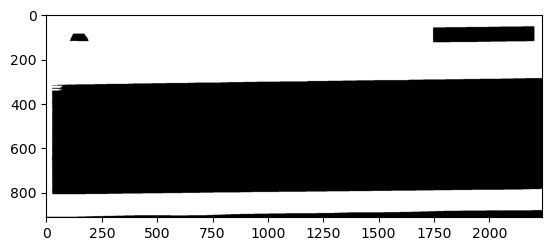

In [61]:
mask2 = cv2.bitwise_not(mask)
plt.imshow(mask2, cmap='gray')

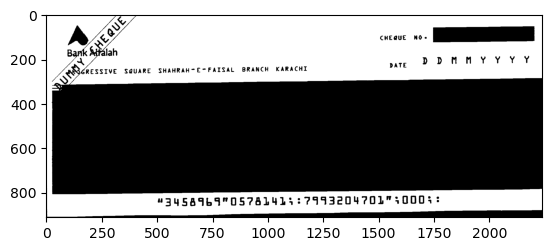

In [62]:
result2 = cv2.bitwise_and(thresh, thresh, mask=mask2)
plt.imshow(result2,cmap='gray')

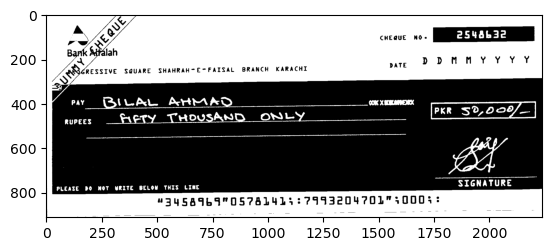

In [63]:
img_mask = cv2.threshold(mask2,150,255, cv2.THRESH_BINARY)[1]
diff = cv2.absdiff(img_mask,thresh)
plt.imshow(cv2.bitwise_not(diff), cmap='gray')

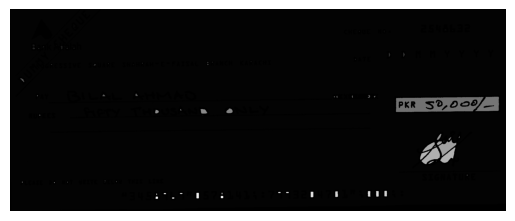

In [65]:
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity=8)
label_image = (255/num_labels)*labels.astype(np.uint8)
plot = plt.imshow(label_image,cmap='gray')
plt.axis('off')
plt.savefig('output_image.png', dpi=300)

In [71]:
import cv2
import pytesseract
from PIL import Image

# Load the image using OpenCV
image = cv2.imread('output_image.png', 0)

# Convert the image to a Pillow Image object
image_pil = Image.fromarray(image)

# Preprocess the image (e.g., resize, denoise, threshold)
# You may need to experiment with different preprocessing techniques based on your specific image

# Perform OCR using Tesseract
text = pytesseract.image_to_string(image_pil)

# Print the extracted text
print("Extracted Text:")
print(text)


Extracted Text:
 




In [67]:
import cv2
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'
# Load the image
image = cv2.imread('output_image.png', 0)

# Apply thresholding to create a binary image
ret, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Convert the binary image to RGB for compatibility with Pytesseract
thresh_rgb = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)

# Use Pytesseract to extract text from the image
text = pytesseract.image_to_string(thresh_rgb)

# Print the extracted text
print("Extracted Text:")
print(text)


Extracted Text:
 




In [19]:
import numpy as np 
from tqdm import tqdm
import cv2
import os
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
init_notebook_mode(connected=True)
RANDOM_SEED = 123
from sklearn import svm

ImportError: cannot import name 'Adam' from 'keras.optimizers' (D:\Anaconda\lib\site-packages\keras\optimizers.py)

In [20]:
pip install Adam

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from keras.optimizers import Adam, RMSprop

In [ ]:
pip install keras

In [ ]:
from keras.optimizers import Adam, RMSprop

In [ ]:
from tensorflow.keras.optimizers import Adam 

In [ ]:
import numpy as np 
from tqdm import tqdm
import cv2
import os
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
init_notebook_mode(connected=True)
RANDOM_SEED = 123
from sklearn import svm

In [ ]:
TRAIN_DIR = ('D:\\Memphis\\Independent Study\\New folder (2)\\TrainSet\\X\\y\\')
TEST_DIR = ('D:\\Memphis\\Independent Study\\New folder (2)\\TestSet\\X\\y\\')

In [ ]:
TRAIN_DIR
#TEST_DIR

In [ ]:
def load_data(dir_path, IMG_SIZE):
   
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    img = img.astype('float32') / 255
                    resized = cv2.resize(img, IMG_SIZE, interpolation = cv2.INTER_AREA)
                    X.append(resized)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels

In [ ]:
IMG_SIZE= (48, 48)

In [ ]:
X_train, y_train, train_labels = load_data(TRAIN_DIR, IMG_SIZE)